In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os

# Replace the path the actual folder name
os.chdir('/content/drive/MyDrive/DSO 574 Assignment 1')

# Confirm that the files are accessible
os.listdir()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


['AirBnB',
 'LAcounty.csv',
 'Assignment 1 Codes.ipynb',
 'merged_listings.csv',
 'merged_reviews.csv',
 'DSO574 Assignment #1 Bonus Draft.ipynb',
 'successful_listings.csv',
 'DSO 574 Assignment Bonus Code Final.ipynb',
 'successful_reviews.csv',
 'successful_reviews_filtered.csv',
 'successful_reviews_filtered2.csv',
 'successful_reviews_filtered3.csv',
 'DSO 574 Assignment Bonus Code Final Continute.ipynb']

In [ ]:
#import package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns

In [ ]:
listings = pd.read_csv('merged_listings.csv')

In [ ]:
listings.head()

id                                               name  \
0   109  Amazing bright elegant condo park front *UPGRA...   
1   344                  Family perfect;Pool;Near Studios!   
2  2708  Beautiful Furnish Mirrored Mini-Suite w/ Firep...   
3  2732                              Zen Life at the Beach   
4  2864             * Beautiful Master Suite/Jacuzzi Tub/*   

                                         description  \
0  *** Unit upgraded with new bamboo flooring, br...   
1  This home is perfect for families; aspiring ch...   
2  Beau Furn Mirror Mini-Suite w/ Fireplace 28% o...   
3  An oasis of tranquility awaits you.<br /><br /...   
4  Centrally located.... Furnished with King Size...   

                               neighborhood_overview  host_response_time  \
0                                                NaN                 NaN   
1  Quiet-yet-close to all the fun in LA! Hollywoo...        within a day   
2  We are minutes away from the Mentor Language I...      within an hour   
3  This is the best part of Santa Monica. Quiet, ...  within a few hours   
4  What makes the neighborhood unique is that the...                 NaN   

  host_response_rate host_acceptance_rate host_is_superhost        room_type  \
0                NaN                   0%                 f  Entire home/apt   
1                70%                  36%                 f  Entire home/apt   
2               100%                 100%                 t     Private room   
3                93%                  57%                 f     Private room   
4                NaN                  NaN                 f  Entire home/apt   

   accommodates  bathrooms_text  bedrooms  \
0             6         2 baths       2.0   
1             6          1 bath       3.0   
2             1       1.5 baths       1.0   
3             1  1 private bath       1.0   
4             2          1 bath       1.0   

                                           amenities  number_of_reviews  \
0  ["Smoke alarm", "Hot tub", "Indoor fireplace",...                  2   
1  ["Fireplace guards", "Children\u2019s dinnerwa...                  8   
2  ["Smoke alarm", "Hot tub", "Indoor fireplace",...                 26   
3  ["Oven", "Smoke alarm", "Hangers", "Host greet...                 21   
4  ["Smoke alarm", "Microwave", "Free parking on ...                  0   

   review_scores_rating  year  month  
0                  80.0  2020      8  
1                  97.0  2020      8  
2                  97.0  2020      8  
3                  94.0  2020      8  
4                   NaN  2020      8

In [ ]:
listings['id'].value_counts()

id
109         6
30773222    6
30822982    6
30820800    6
30820370    6
           ..
43907657    1
43887113    1
43845309    1
43844294    1
47390383    1
Name: count, Length: 42463, dtype: int64

In [ ]:
listings.columns

Index(['id', 'name', 'description', 'neighborhood_overview',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'room_type', 'accommodates', 'bathrooms_text',
       'bedrooms', 'amenities', 'number_of_reviews', 'review_scores_rating',
       'year', 'month'],
      dtype='object')

# Define Success

1. High Review Score (out of 100)

The overall rating a listing receives based on guest reviews. This score is typically an aggregate measure of different aspects of a guests' experience, such as cleanliness, accuracy, communication, location, check-in, and value.

2. High number of bookings (occupancy ≥ 70%)

Using numbers of reviews

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


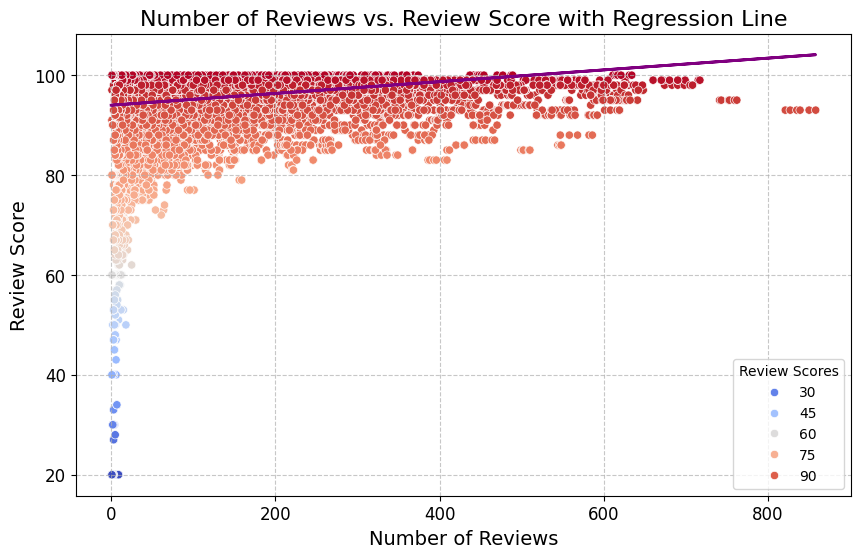

In [ ]:
# prompt: plot the  numbers of reviews vs. review score and show the regression line，use coolwarm color and make the graph nicer

# Assuming 'listings' DataFrame is already loaded as in the previous code

plt.figure(figsize=(10, 6))  # Adjust figure size for better visualization

# Create the scatter plot with specified colormap
sns.scatterplot(x='number_of_reviews', y='review_scores_rating', data=listings, palette="coolwarm", hue='review_scores_rating')

# Fit a linear regression model
model = smf.ols('review_scores_rating ~ number_of_reviews', data=listings).fit()
predictions = model.predict(listings['number_of_reviews'])

# Plot the regression line
plt.plot(listings['number_of_reviews'], predictions, color='purple', linewidth=2)

# Customize the plot
plt.title('Number of Reviews vs. Review Score with Regression Line', fontsize=16)
plt.xlabel('Number of Reviews', fontsize=14)
plt.ylabel('Review Score', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7) # Add a subtle grid
plt.legend(title='Review Scores', fontsize=10) # Improve legend appearance

# Improve tick marks and labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()


In [ ]:
# prompt: group by the id, with the mean of review scores and numbers of reviews, order by Id number and drop null

# Group by 'id', calculate the mean of 'review_scores_rating' and 'number_of_reviews',
# order by 'id', and drop rows with any null values.
grouped_listings = listings.groupby('id').agg(
    {'review_scores_rating': 'mean', 'number_of_reviews': 'sum'}
).reset_index().dropna().sort_values(by='id')

grouped_listings


id  review_scores_rating  number_of_reviews
0           109                  80.0                 12
1           344                  97.0                 16
2          2708                  97.0                162
3          2732                  94.0                126
5          5728                  96.0               1550
...         ...                   ...                ...
42379  47337808                 100.0                  1
42390  47340625                 100.0                  1
42427  47363464                 100.0                  1
42441  47374854                 100.0                  1
42458  47389079                 100.0                  1

[31035 rows x 3 columns]

In [ ]:
# prompt:  use px to plot the review_scores_rating vs. number_of_reviews and hue by id，add fitted line and can you change the color?

import plotly.express as px

# Assuming 'grouped_listings' DataFrame is already loaded as in the previous code

fig = px.scatter(grouped_listings, x='number_of_reviews', y='review_scores_rating',
                 color='id', trendline="ols",
                 title='Review Scores Rating vs. Number of Reviews with Fitted Line')

fig.update_traces(marker=dict(size=8, opacity=0.6), selector=dict(mode='markers')) # Customize marker appearance
fig.update_traces(line=dict(color='red'), selector=dict(type='scattergl')) # Change the trendline color

fig.show()


In [ ]:
grouped_listings['number_of_reviews'].describe()

count    31035.000000
mean       214.362301
std        385.451121
min          1.000000
25%         12.000000
50%         58.000000
75%        236.000000
max       5030.000000
Name: number_of_reviews, dtype: float64

In [ ]:
grouped_listings['review_scores_rating'].describe()

count    31035.000000
mean        93.967425
std         10.161103
min         20.000000
25%         93.000000
50%         97.000000
75%        100.000000
max        100.000000
Name: review_scores_rating, dtype: float64

In [ ]:
success_listings = grouped_listings[(grouped_listings['review_scores_rating'] >= 93.967425) & (grouped_listings['number_of_reviews'] >= 214.362301)]
success_listings['id'].unique()

array([    5728,     5729,     7992, ..., 43818249, 44017696, 44188863])

In [ ]:
# prompt: filtered the listings dataset, make sure it only contains the id in success_listings

# Assuming 'listings' and 'success_listings' DataFrames are already loaded as in the previous code

# Extract the unique IDs from the success_listings DataFrame
successful_ids = success_listings['id'].unique()

# Filter the listings DataFrame to include only the IDs present in successful_ids
successful_listings = listings[listings['id'].isin(successful_ids)]

# Display the filtered listings DataFrame (optional)
successful_listings.head()


id                                               name  \
5   5728    Tiny Home in Artistic Oasis near Venice and LAX   
6   5729     Zen Room with Floating Bed near Venice and LAX   
11  7992  Quiet,Walkable Area/Sanitized,New Kitchen,Cozy...   
12  8770                Cozy Guest House on Venice Walk St.   
13  9140                                   City Place Lofts   

                                          description  \
5   Our home is located near Venice Beach without ...   
6   Our home is located near Venice Beach without ...   
11  Furnished apartment with a walk score of 77 in...   
12  <b>The space</b><br />Are you looking for some...   
13  Shared space - private room with its own entra...   

                                neighborhood_overview  host_response_time  \
5   Our neighborhood is very quiet and save. There...      within an hour   
6   Our neighborhood is very quiet and save. There...      within an hour   
11  Atwater Village has a variety of great shops a...  within a few hours   
12  Close to the beach and the neighborhood walk s...                 NaN   
13                                                NaN                 NaN   

   host_response_rate host_acceptance_rate host_is_superhost        room_type  \
5                100%                  95%                 t     Private room   
6                100%                  95%                 t     Private room   
11               100%                  99%                 t  Entire home/apt   
12                NaN                  84%                 t  Entire home/apt   
13                NaN                 100%                 f     Private room   

    accommodates    bathrooms_text  bedrooms  \
5              2     1 shared bath       1.0   
6              3     1 shared bath       1.0   
11             4            1 bath       1.0   
12             2            1 bath       NaN   
13             2  1.5 shared baths       1.0   

                                            amenities  number_of_reviews  \
5   ["Smoke alarm", "Private entrance", "Microwave...                310   
6   ["Carbon monoxide alarm", "Smoke alarm", "Priv...                230   
11  ["Lockbox", "Smoke alarm", "Private entrance",...                240   
12  ["Smoke alarm", "Private entrance", "Microwave...                401   
13  ["Lockbox", "Room-darkening shades", "Smoke al...                393   

    review_scores_rating  year  month  
5                   96.0  2020      8  
6                   95.0  2020      8  
11                  99.0  2020      8  
12                  94.0  2020      8  
13                  95.0  2020      8

# Factors that make a Successful Listing

## Description

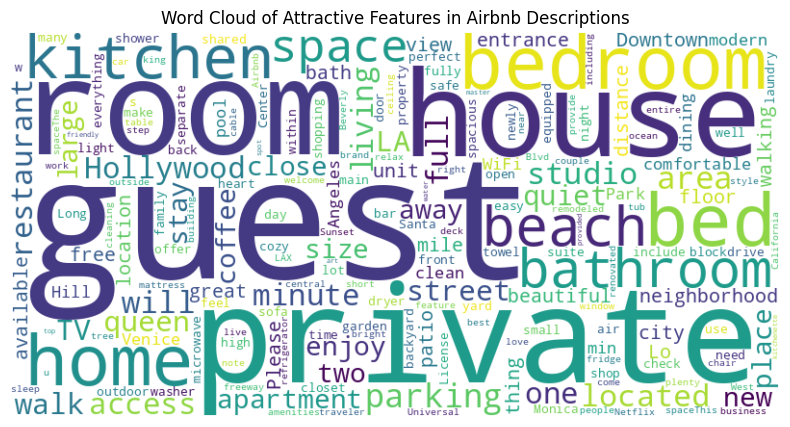

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re

# Combine all descriptions into one text
all_descriptions = " ".join(successful_listings['description'].dropna())

# Clean the text by removing HTML tags and special characters
all_descriptions = re.sub(r'<.*?>', '', all_descriptions)  # Remove HTML tags

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white", collocations=False).generate(all_descriptions)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Attractive Features in Airbnb Descriptions")
plt.show()


## Neighborhood Overview

In [ ]:
successful_listings['neighborhood_overview'].dropna()

5         Our neighborhood is very quiet and save. There...
6         Our neighborhood is very quiet and save. There...
11        Atwater Village has a variety of great shops a...
12        Close to the beach and the neighborhood walk s...
16        We're in the Miracle Mile that is right in the...
                                ...                        
184380    The AC Hotel Los Angeles South Bay is surround...
184398    The AC Hotel Los Angeles South Bay is surround...
184490       Our neighborhood is quiet, safe, and tranquil.
184918    Welcome to Venice! Venice is unique to say the...
185126    Hollywood Hills on the Studio City side, close...
Name: neighborhood_overview, Length: 31966, dtype: object

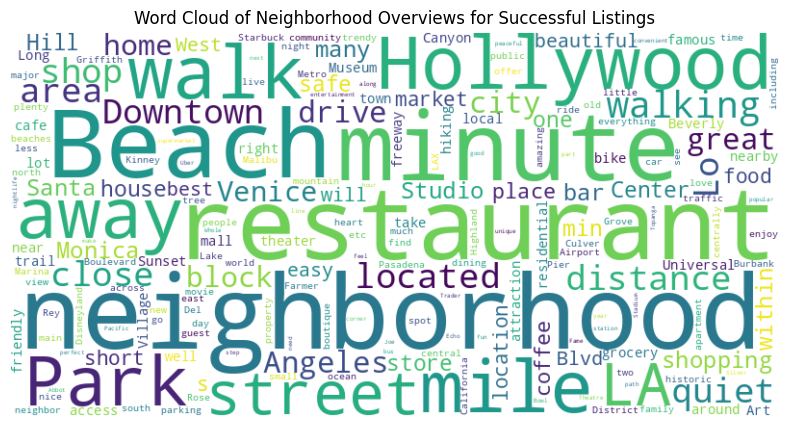

In [ ]:

# Combine all neighborhood overviews into one text
all_neighborhood_overviews = " ".join(successful_listings['neighborhood_overview'].dropna())

# Clean the text by removing HTML tags and special characters
all_neighborhood_overviews = re.sub(r'<.*?>', '', all_neighborhood_overviews)  # Remove HTML tags

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white", collocations=False).generate(all_neighborhood_overviews)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Neighborhood Overviews for Successful Listings")
plt.show()


### Description & Neighborhood Overview Interpretation

**1. Privacy & Comfort**

- Large words like "private," "guest," "room," "bedroom," "house," "home" indicate that privacy is a top priority for travelers.

- "cozy," "comfortable," "quiet," "peaceful" suggest that guests seek a relaxing and home-like atmosphere.

**2. Location & Accessibility Are Key Selling Points**

- Guests highly value proximity to attractions: The word clouds show major locations like "beach," "Hollywood," "Downtown," "Venice," "Griffith," "Santa Monica."

- Words like "walking," "walk," "street," "block," "distance," "minute," "drive," "close," "away" indicate that ease of access is a critical factor in a guest’s decision.

**3. Guests Love Well-Equipped Spaces**

- Essential amenities like "kitchen," "bathroom," "parking," "WiFi," "TV," "laundry" appear frequently in successful listings.

- Words like "full," "queen," "large," "size," "bed" suggest that comfortable sleeping arrangements are a major factor in guest satisfaction.

**4. Dining & Shopping Nearby Boosts Appeal**

- The presence of words like "restaurant," "bar," "cafe," "coffee," "food," "grocery," "shop," "shopping," "market," "store" suggests that access to food and retail options is a strong selling point.

**5. Safety, Community, & Atmosphere Influence Bookings**

- Guests care about safety and a pleasant neighborhood environment—words like "safe," "quiet," "residential," "home," "friendly" show that hosts frequently highlight these aspects.


## Host

In [ ]:

successful_listings['superhost'] = successful_listings['host_is_superhost'].apply(lambda x: 1 if x == 't' else 0)

# Display the updated DataFrame (optional)
successful_listings.head()


<ipython-input-18-e844fa19c2e9>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



id                                               name  \
5   5728    Tiny Home in Artistic Oasis near Venice and LAX   
6   5729     Zen Room with Floating Bed near Venice and LAX   
11  7992  Quiet,Walkable Area/Sanitized,New Kitchen,Cozy...   
12  8770                Cozy Guest House on Venice Walk St.   
13  9140                                   City Place Lofts   

                                          description  \
5   Our home is located near Venice Beach without ...   
6   Our home is located near Venice Beach without ...   
11  Furnished apartment with a walk score of 77 in...   
12  <b>The space</b><br />Are you looking for some...   
13  Shared space - private room with its own entra...   

                                neighborhood_overview  host_response_time  \
5   Our neighborhood is very quiet and save. There...      within an hour   
6   Our neighborhood is very quiet and save. There...      within an hour   
11  Atwater Village has a variety of great shops a...  within a few hours   
12  Close to the beach and the neighborhood walk s...                 NaN   
13                                                NaN                 NaN   

   host_response_rate host_acceptance_rate host_is_superhost        room_type  \
5                100%                  95%                 t     Private room   
6                100%                  95%                 t     Private room   
11               100%                  99%                 t  Entire home/apt   
12                NaN                  84%                 t  Entire home/apt   
13                NaN                 100%                 f     Private room   

    accommodates    bathrooms_text  bedrooms  \
5              2     1 shared bath       1.0   
6              3     1 shared bath       1.0   
11             4            1 bath       1.0   
12             2            1 bath       NaN   
13             2  1.5 shared baths       1.0   

                                            amenities  number_of_reviews  \
5   ["Smoke alarm", "Private entrance", "Microwave...                310   
6   ["Carbon monoxide alarm", "Smoke alarm", "Priv...                230   
11  ["Lockbox", "Smoke alarm", "Private entrance",...                240   
12  ["Smoke alarm", "Private entrance", "Microwave...                401   
13  ["Lockbox", "Room-darkening shades", "Smoke al...                393   

    review_scores_rating  year  month  superhost  
5                   96.0  2020      8          1  
6                   95.0  2020      8          1  
11                  99.0  2020      8          1  
12                  94.0  2020      8          1  
13                  95.0  2020      8          0

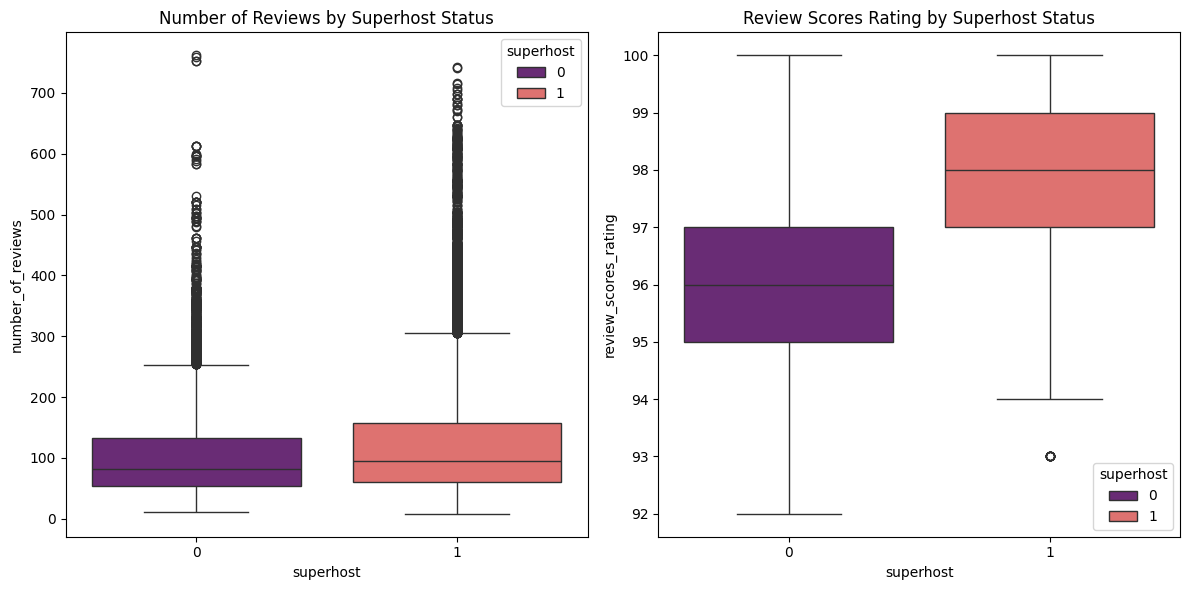

In [ ]:
# prompt: boxplots the superhost with numbers of review and review scores in one page

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'successful_listings' DataFrame is already loaded

plt.figure(figsize=(12, 6))

# Boxplot for number of reviews
plt.subplot(1, 2, 1)
sns.boxplot(x='superhost', y='number_of_reviews', data=successful_listings, hue='superhost', palette="magma")
plt.title('Number of Reviews by Superhost Status')

# Boxplot for review scores rating
plt.subplot(1, 2, 2)
sns.boxplot(x='superhost', y='review_scores_rating', data=successful_listings, hue='superhost', palette="magma")
plt.title('Review Scores Rating by Superhost Status')

plt.tight_layout()  # Adjust spacing between subplots
plt.show()


In [ ]:
successful_listings['host_response_time'].value_counts()

host_response_time
within an hour        23224
within a few hours     5731
within a day           2424
a few days or more      405
Name: count, dtype: int64

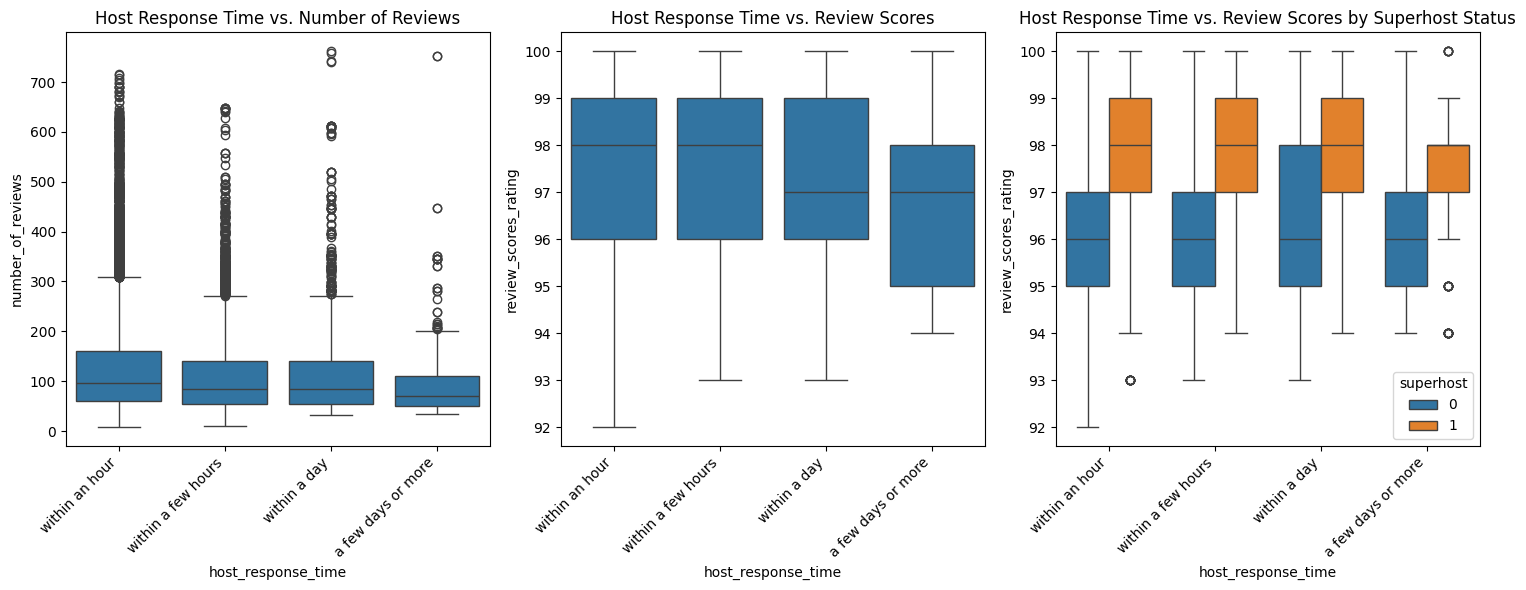

In [ ]:
# prompt: boxplots the host_response_time and numbers of reviews and review scores

# Assuming 'successful_listings' DataFrame is already loaded

plt.figure(figsize=(15, 6))

# Boxplot for host response time
plt.subplot(1, 3, 1)
sns.boxplot(x='host_response_time', y='number_of_reviews', data=successful_listings)
plt.title('Host Response Time vs. Number of Reviews')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability

# Boxplot for number of reviews
plt.subplot(1, 3, 2)
sns.boxplot(x='host_response_time', y='review_scores_rating', data=successful_listings)
plt.title('Host Response Time vs. Review Scores')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability


plt.subplot(1,3,3)
sns.boxplot(x='host_response_time', y='review_scores_rating', data=successful_listings, hue='superhost')
plt.title('Host Response Time vs. Review Scores by Superhost Status')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability


plt.tight_layout()  # Adjust spacing between subplots
plt.show()


In [ ]:
# Convert percentage columns to numeric by removing '%' and converting to float
successful_listings['host_response_rate'] = successful_listings['host_response_rate'].astype(str).str.rstrip('%').astype(float)
successful_listings['host_acceptance_rate'] = successful_listings['host_acceptance_rate'].astype(str).str.rstrip('%').astype(float)


# Select relevant columns and drop missing values
# Impute missing values with the mean instead of dropping them
df_model = successful_listings[['number_of_reviews', 'host_response_rate', 'host_acceptance_rate', 'superhost']]
df_model.fillna(df_model.mean(), inplace=True)

# Define independent variables (X) and dependent variable (y)
X = df_model[['host_response_rate', 'host_acceptance_rate', 'superhost']]
y = df_model['number_of_reviews']

# Add a constant term for the regression model
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Display the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      number_of_reviews   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     237.3
Date:                Thu, 27 Feb 2025   Prob (F-statistic):          1.58e-152
Time:                        06:11:50   Log-Likelihood:            -2.2106e+05
No. Observations:               37392   AIC:                         4.421e+05
Df Residuals:                   37388   BIC:                         4.422e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   46.8028 

<ipython-input-22-af7c777a4098>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-22-af7c777a4098>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-22-af7c777a4098>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# Convert percentage columns to numeric by removing '%' and converting to float
successful_listings['host_response_rate'] = successful_listings['host_response_rate'].astype(str).str.rstrip('%').astype(float)
successful_listings['host_acceptance_rate'] = successful_listings['host_acceptance_rate'].astype(str).str.rstrip('%').astype(float)


# Select relevant columns and drop missing values
# Impute missing values with the mean instead of dropping them
df_model = successful_listings[['review_scores_rating', 'host_response_rate', 'host_acceptance_rate', 'superhost']]
df_model.fillna(df_model.mean(), inplace=True)

X = df_model[['host_response_rate', 'host_acceptance_rate', 'superhost']]
y = df_model['review_scores_rating']

# Add a constant term for the regression model
X = sm.add_constant(X)

# Fit the linear regression model
model2 = sm.OLS(y, X).fit()

# Display the model summary
print(model2.summary())

<ipython-input-23-4bfcb17c5f27>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



                             OLS Regression Results                             
Dep. Variable:     review_scores_rating   R-squared:                       0.190
Model:                              OLS   Adj. R-squared:                  0.189
Method:                   Least Squares   F-statistic:                     2915.
Date:                  Thu, 27 Feb 2025   Prob (F-statistic):               0.00
Time:                          06:11:51   Log-Likelihood:                -69262.
No. Observations:                 37392   AIC:                         1.385e+05
Df Residuals:                     37388   BIC:                         1.386e+05
Df Model:                             3                                         
Covariance Type:              nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const       

<ipython-input-23-4bfcb17c5f27>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-23-4bfcb17c5f27>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



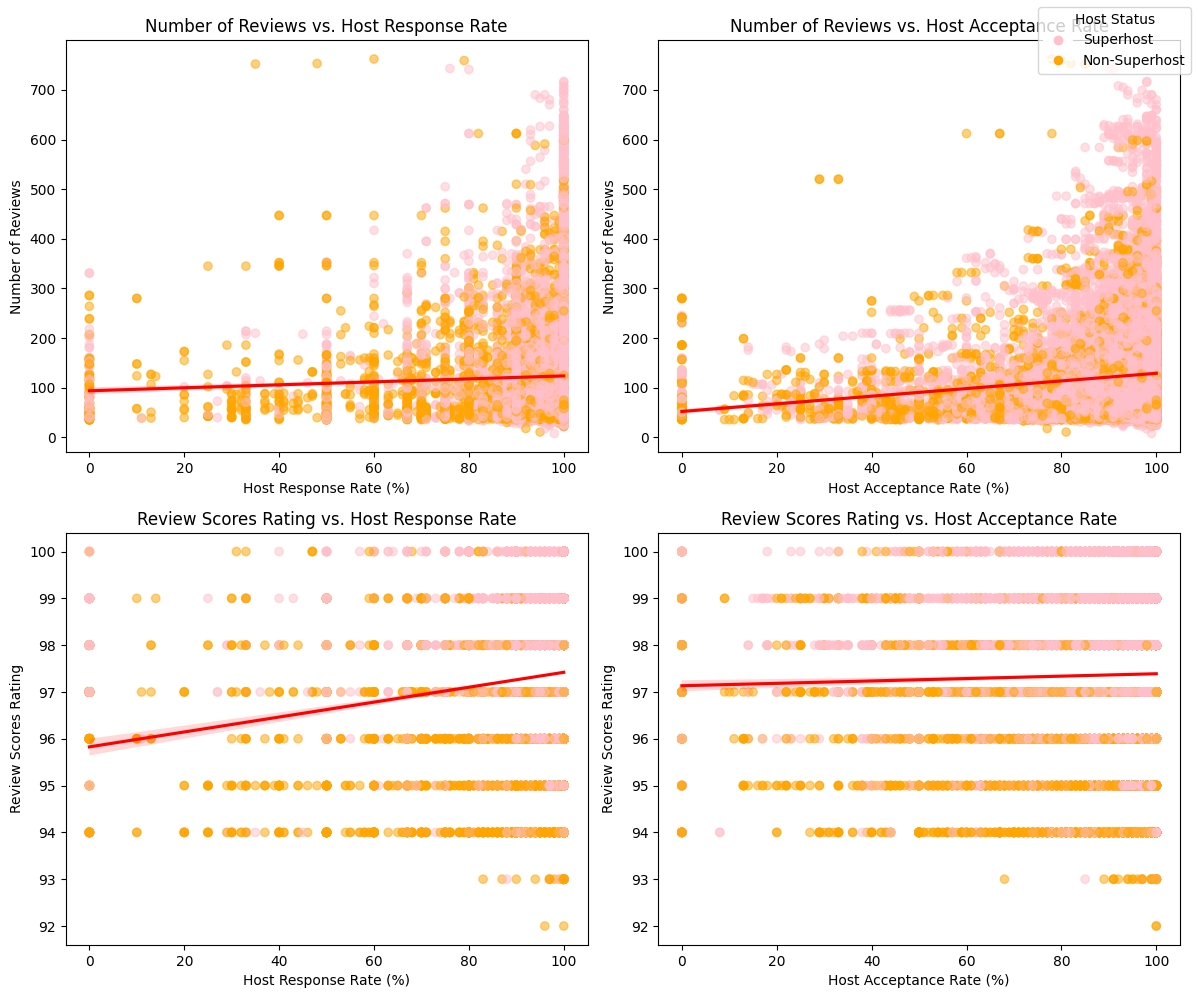

In [ ]:
# Reload the dataset to ensure correct data types

df_listings = pd.read_csv('successful_listings.csv')


# Ensure 'host_is_superhost' is correctly converted to binary (1 or 0)
df_listings['host_is_superhost'] = df_listings['host_is_superhost'].map({'t': 1, 'f': 0})

# Convert percentage columns to numeric (removing '%' if necessary)
df_listings['host_response_rate'] = df_listings['host_response_rate'].astype(str).str.rstrip('%').astype(float)
df_listings['host_acceptance_rate'] = df_listings['host_acceptance_rate'].astype(str).str.rstrip('%').astype(float)

# Select relevant columns and drop missing values
df_plot = df_listings[['number_of_reviews', 'review_scores_rating', 'host_response_rate',
                       'host_acceptance_rate', 'host_is_superhost']].dropna()

# Convert 'host_is_superhost' to integer for color mapping
df_plot['host_is_superhost'] = df_plot['host_is_superhost'].astype(int)

colors = df_plot['host_is_superhost'].map({1: 'pink', 0: 'orange'})

# Set up the figure
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Scatter plot: Number of reviews vs. Host Response Rate
axes[0, 0].scatter(df_plot['host_response_rate'], df_plot['number_of_reviews'], c=colors, alpha=0.5)
sns.regplot(ax=axes[0, 0], x=df_plot['host_response_rate'], y=df_plot['number_of_reviews'], scatter=False, color='red')
axes[0, 0].set_title("Number of Reviews vs. Host Response Rate")
axes[0, 0].set_xlabel("Host Response Rate (%)")
axes[0, 0].set_ylabel("Number of Reviews")

# Scatter plot: Number of reviews vs. Host Acceptance Rate
axes[0, 1].scatter(df_plot['host_acceptance_rate'], df_plot['number_of_reviews'], c=colors, alpha=0.5)
sns.regplot(ax=axes[0, 1], x=df_plot['host_acceptance_rate'], y=df_plot['number_of_reviews'], scatter=False, color='red')
axes[0, 1].set_title("Number of Reviews vs. Host Acceptance Rate")
axes[0, 1].set_xlabel("Host Acceptance Rate (%)")
axes[0, 1].set_ylabel("Number of Reviews")

# Scatter plot: Review Scores Rating vs. Host Response Rate
axes[1, 0].scatter(df_plot['host_response_rate'], df_plot['review_scores_rating'], c=colors, alpha=0.5)
sns.regplot(ax=axes[1, 0], x=df_plot['host_response_rate'], y=df_plot['review_scores_rating'], scatter=False, color='red')
axes[1, 0].set_title("Review Scores Rating vs. Host Response Rate")
axes[1, 0].set_xlabel("Host Response Rate (%)")
axes[1, 0].set_ylabel("Review Scores Rating")

# Scatter plot: Review Scores Rating vs. Host Acceptance Rate
axes[1, 1].scatter(df_plot['host_acceptance_rate'], df_plot['review_scores_rating'], c=colors, alpha=0.5)
sns.regplot(ax=axes[1, 1], x=df_plot['host_acceptance_rate'], y=df_plot['review_scores_rating'], scatter=False, color='red')
axes[1, 1].set_title("Review Scores Rating vs. Host Acceptance Rate")
axes[1, 1].set_xlabel("Host Acceptance Rate (%)")
axes[1, 1].set_ylabel("Review Scores Rating")

# Add a legend manually
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='pink', markersize=8, label="Superhost"),
           plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='orange', markersize=8, label="Non-Superhost")]
fig.legend(handles=handles, loc='upper right', title="Host Status")

# Adjust layout and display
plt.tight_layout()
plt.show()

### Room Type

<ipython-input-25-4e9625d2eed7>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




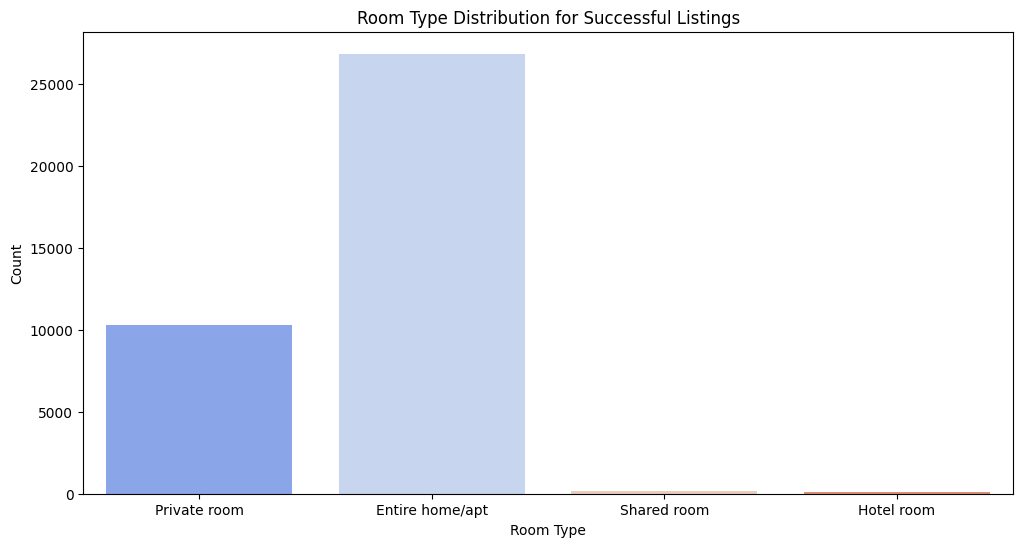

In [ ]:


plt.figure(figsize=(12, 6))
sns.countplot(x='room_type', data=successful_listings, palette="coolwarm")
plt.title('Room Type Distribution for Successful Listings')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.show()


In [ ]:
# prompt: using px to boxplot room type with the numbers of reviews and review scores with dataset = successful_listings

import plotly.express as px

fig = px.box(successful_listings, x="room_type", y="number_of_reviews", color="room_type", title="Room Type vs. Number of Reviews")
fig.show()

fig = px.box(successful_listings, x="room_type", y="review_scores_rating", color="room_type", title="Room Type vs. Review Scores Rating")
fig.show()


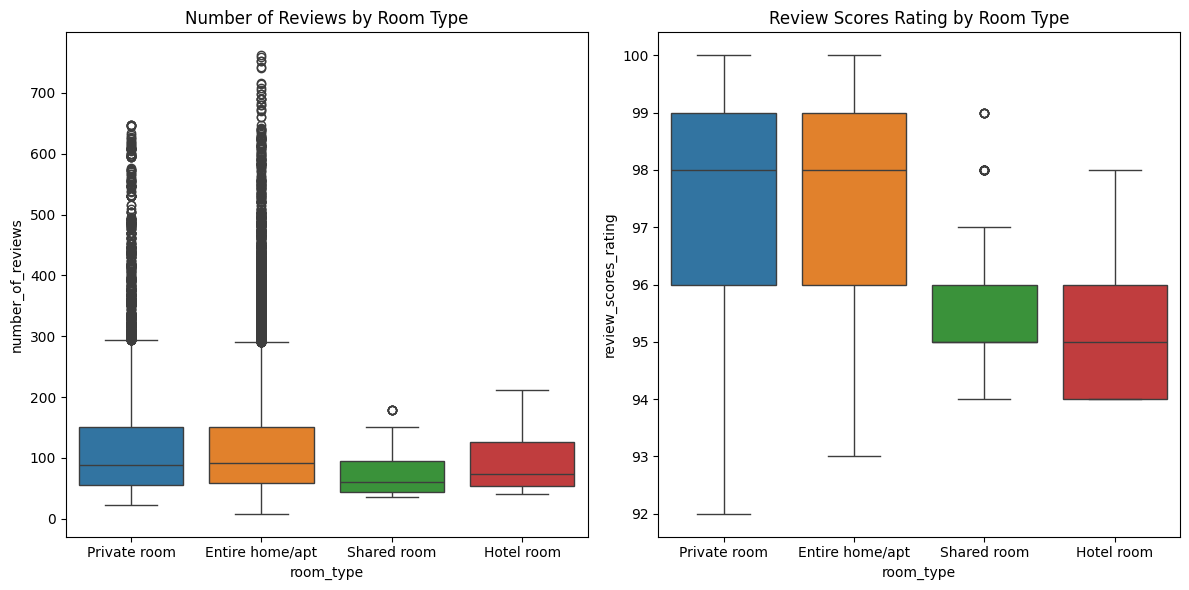

In [ ]:
¥
# prompt:  boxplots room type with the numbers of reviews and review scores with dataset = successful_listings , hue by room_type in one page

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'successful_listings' DataFrame is already loaded

plt.figure(figsize=(12, 6))

# Boxplot for number of reviews
plt.subplot(1, 2, 1)
sns.boxplot(x='room_type', y='number_of_reviews', data=successful_listings, hue='room_type')
plt.title('Number of Reviews by Room Type')
plt.xticks(ha='center')

# Boxplot for review scores rating
plt.subplot(1, 2, 2)
sns.boxplot(x='room_type', y='review_scores_rating', data=successful_listings, hue='room_type')
plt.title('Review Scores Rating by Room Type')
plt.xticks(ha='center')

plt.tight_layout()
plt.show()
